# A. Librerias y rutas

In [6]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from IPython.display import display
from PIL import Image

# B. Funciones

In [7]:
def get_chrome_driver(remote_url="http://localhost:4444/wd/hub", print_view=False, headless=False):
    options = webdriver.ChromeOptions()
    options.add_argument("--no-sandbox")
    options.add_argument("--start-maximized")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--ignore-certificate-errors")

    # Argumentos opcionales
    if print_view:
        options.add_argument("--disable-print-preview")
    if headless:
        options.add_argument("--headless=new") 

    # Configurar el driver remoto
    driver = webdriver.Remote(
        command_executor=remote_url,
        options=options
    )

    return driver

In [8]:
def take_screenshot(driver, step_name):
    screenshot_path = f"/tmp/{step_name}.png"
    driver.save_screenshot(screenshot_path)
    print(f"Captura de pantalla guardada: {screenshot_path}")
    
    # Mostrar la imagen en el notebook
    image = Image.open(screenshot_path)
    display(image)

# C. Prueba

In [9]:
driver = get_chrome_driver()

Captura de pantalla guardada: /tmp/inicio_driver.png


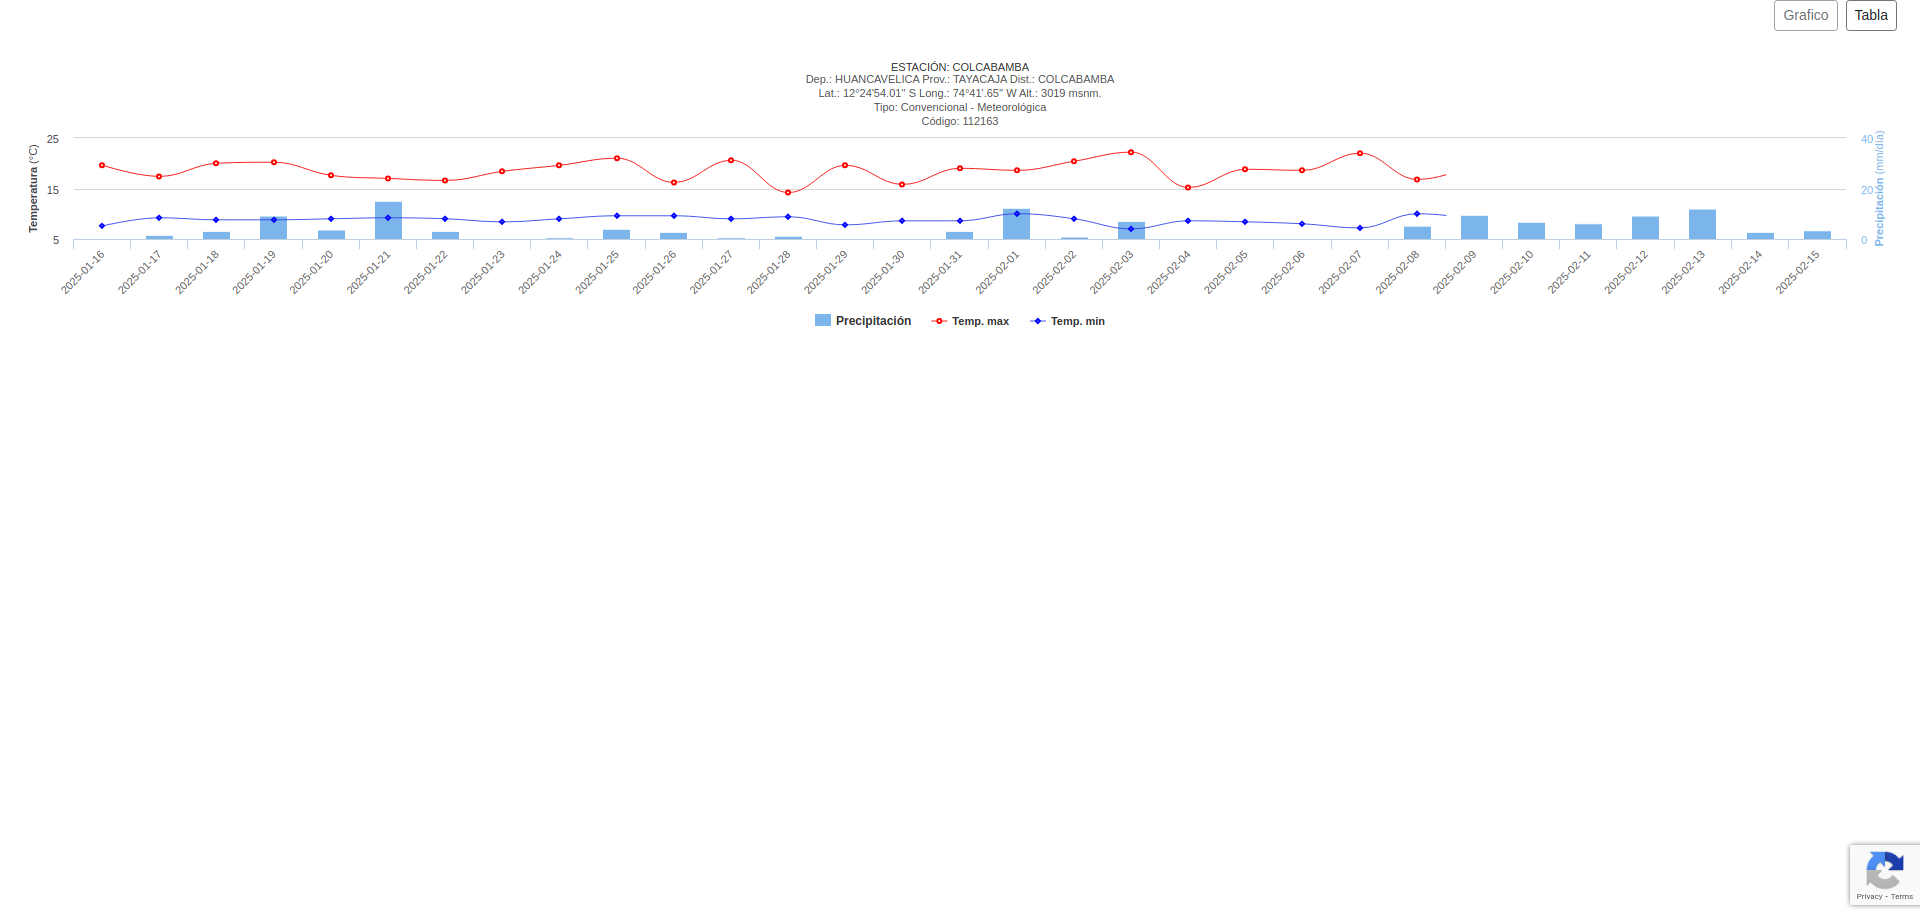

In [10]:
url = 'https://www.senamhi.gob.pe/mapas/mapa-estaciones-2/map_red_graf.php?cod=112163&estado=REAL&tipo_esta=M&cate=CO&cod_old='
driver.get(url)
take_screenshot(driver, "inicio_driver")

Captura de pantalla guardada: /tmp/inicio_driver.png


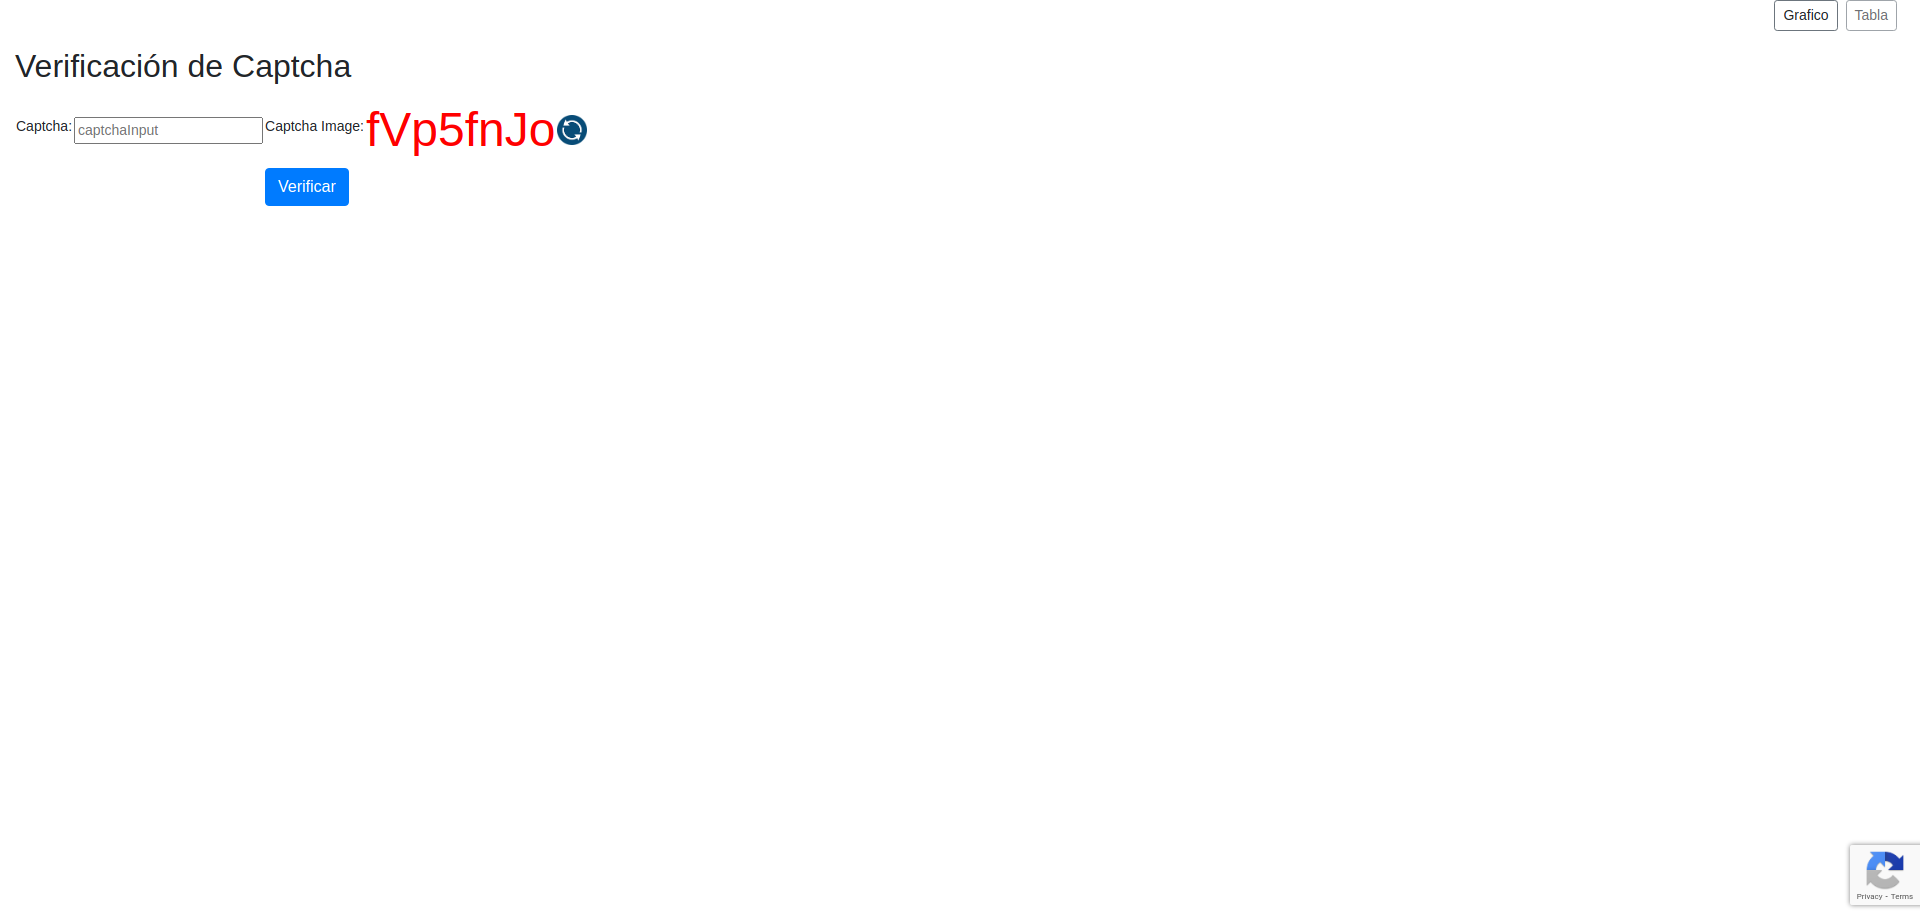

In [11]:
# Click en el botón "Tabla" usando By.ID
driver.find_element(By.ID, "tabl").click()
take_screenshot(driver, "inicio_driver")

Captcha encontrado: fVp5fnJo
Captura de pantalla guardada: /tmp/inicio_driver.png


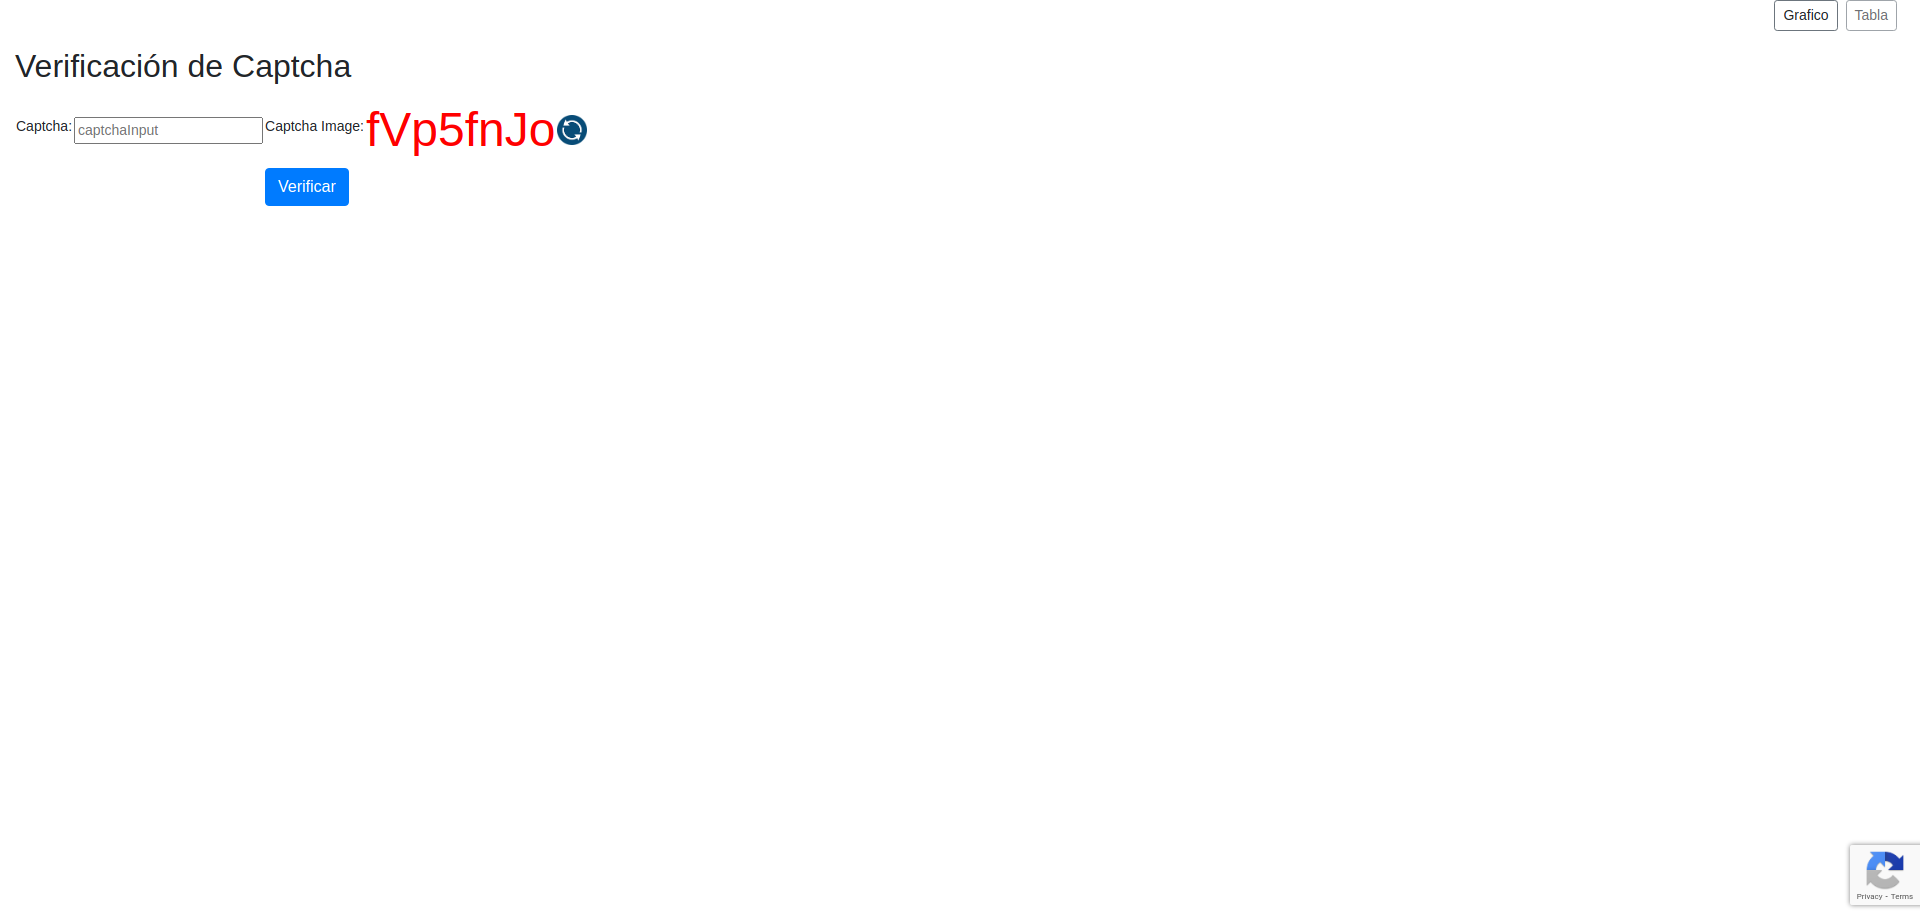

In [12]:
# Extraer el html de la página
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

# Buscar el elemento del captcha por su tag y atributos característicos
# Típicamente el captcha está en un span con estilo de color rojo y tamaño grande
captcha_element = soup.find('span', {'style': 'color: red; font-size:xxx-large'})
if captcha_element:
    print("Captcha encontrado:", captcha_element.text)
else:
    print("Captcha no encontrado")

take_screenshot(driver, "inicio_driver")


Captura de pantalla guardada: /tmp/inicio_driver.png


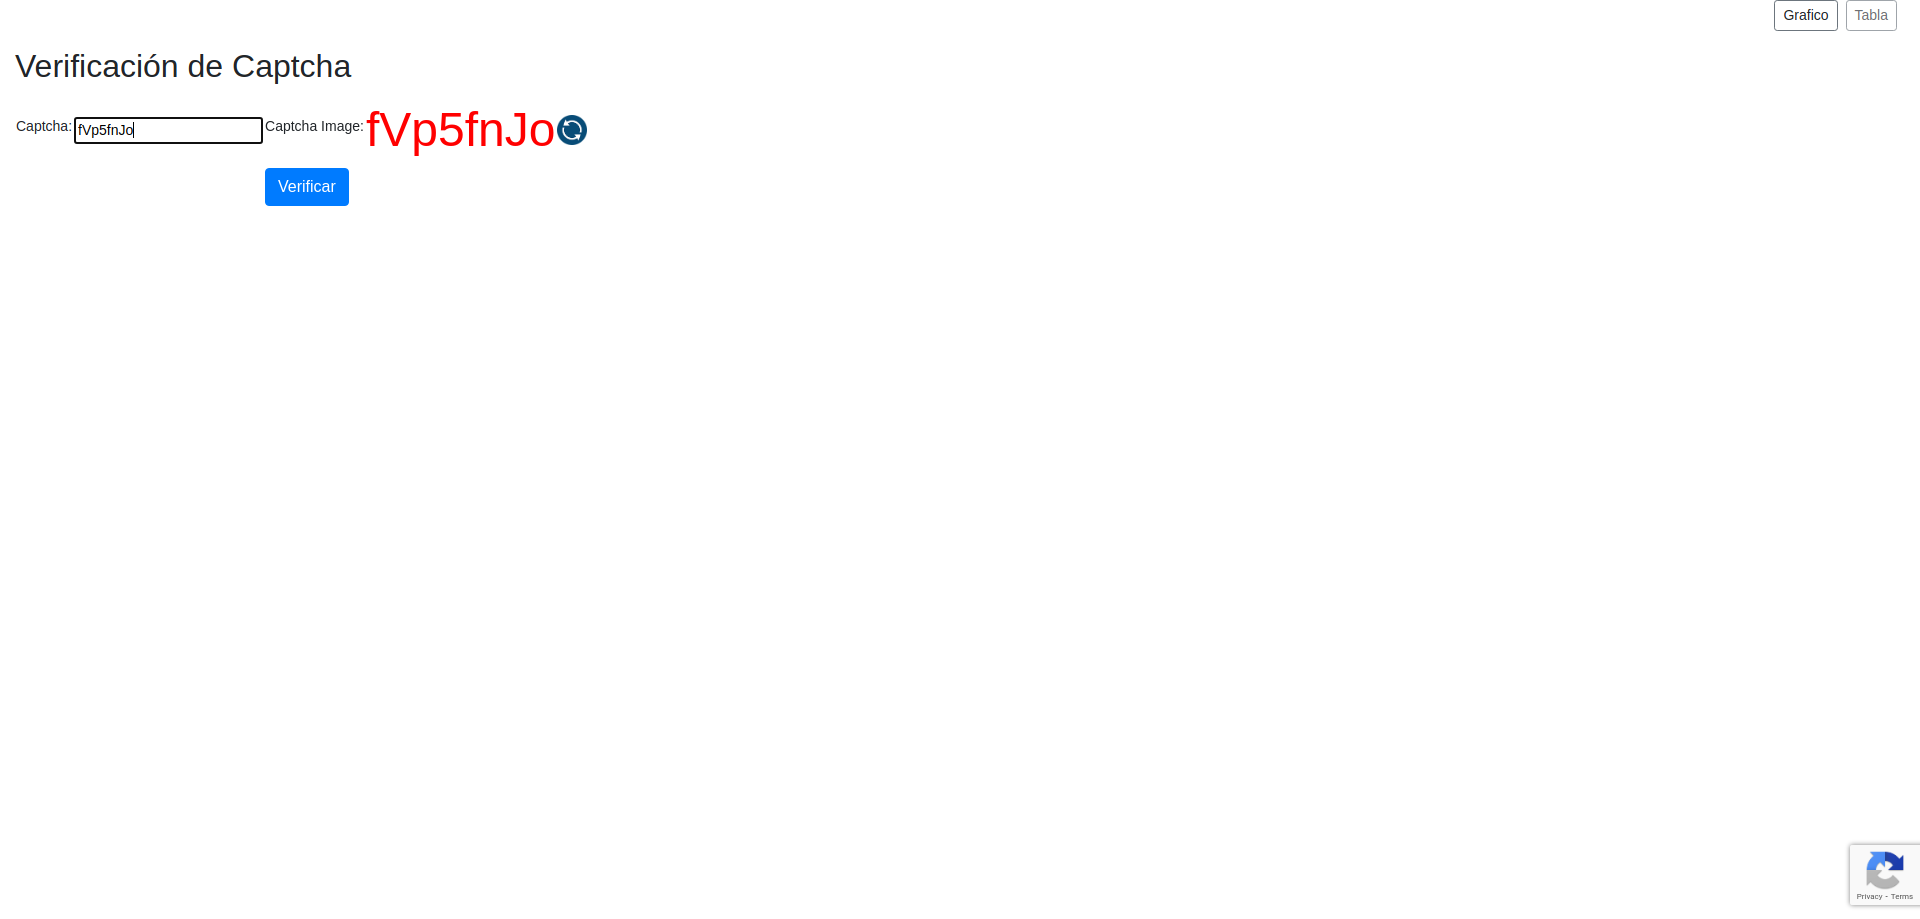

In [13]:
# Encontrar el campo de entrada del captcha por su ID
captcha_input = driver.find_element(By.ID, "captchaInput")

# Ingresar el texto del captcha
captcha_input.send_keys(captcha_element.text)
take_screenshot(driver, "captchaInput")

Captura de pantalla guardada: /tmp/inicio_driver.png


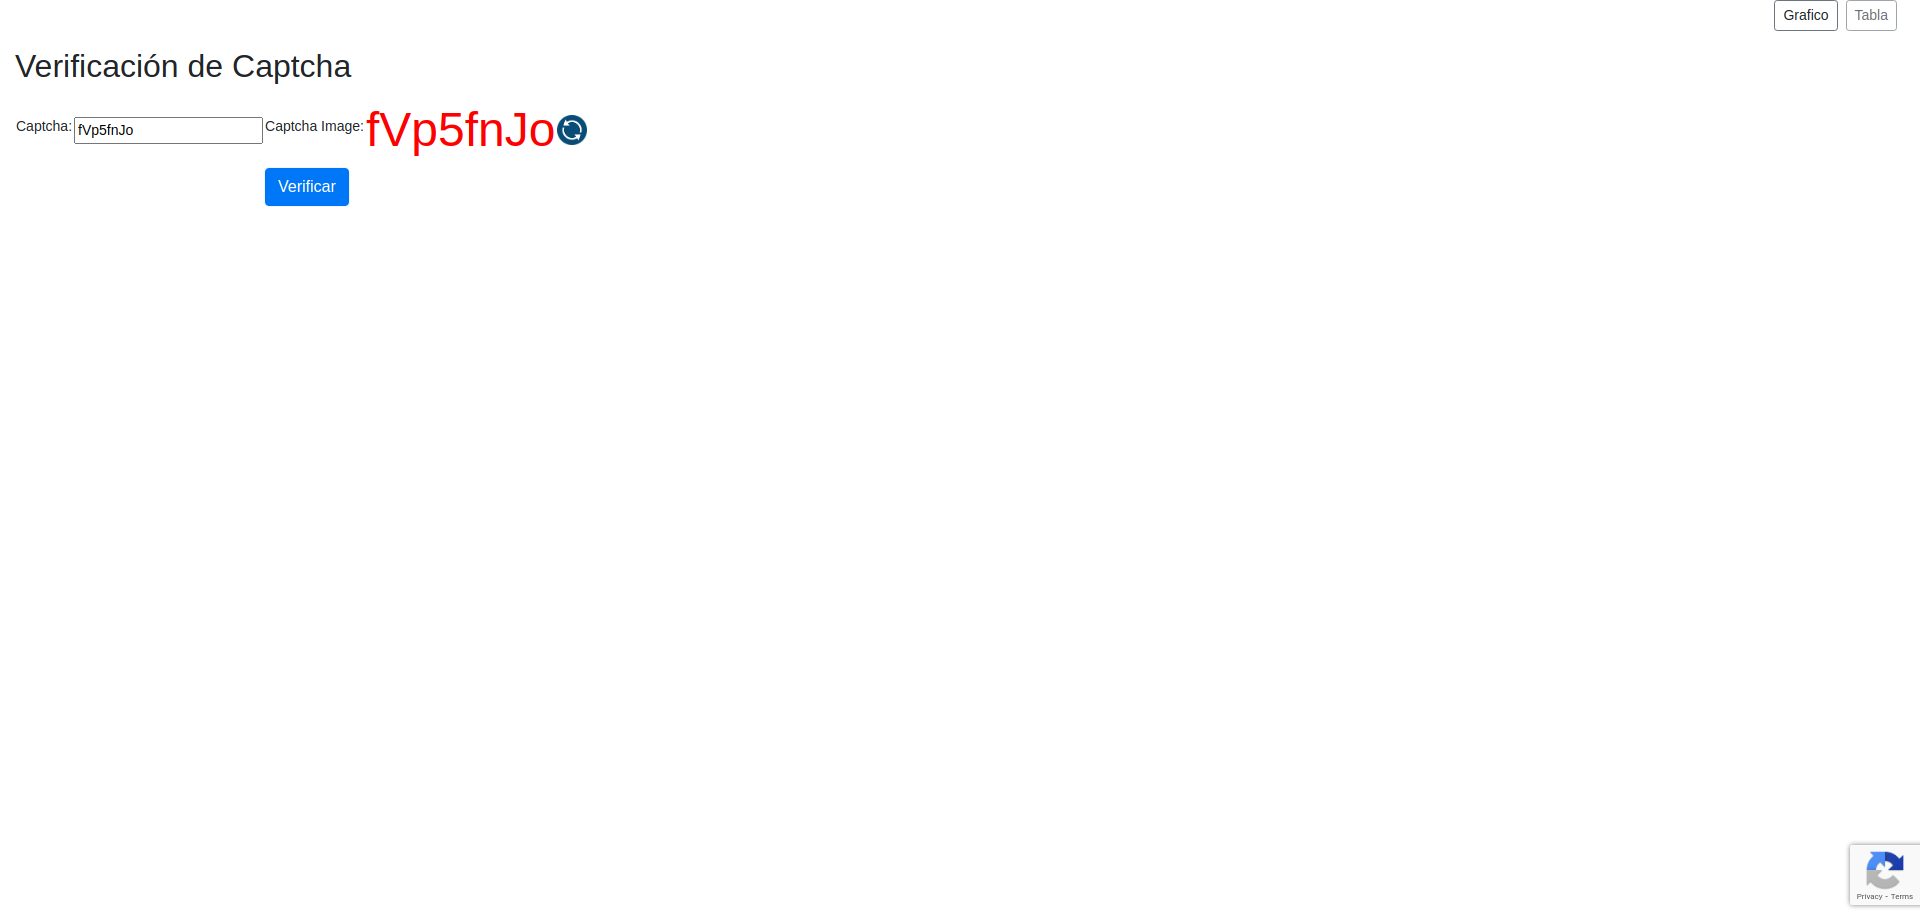

In [14]:
# Click en el botón "Verificar" usando By.ID
driver.find_element(By.ID, "entrar").click()
take_screenshot(driver, "entrar")

Captura de pantalla guardada: /tmp/inicio_driver.png


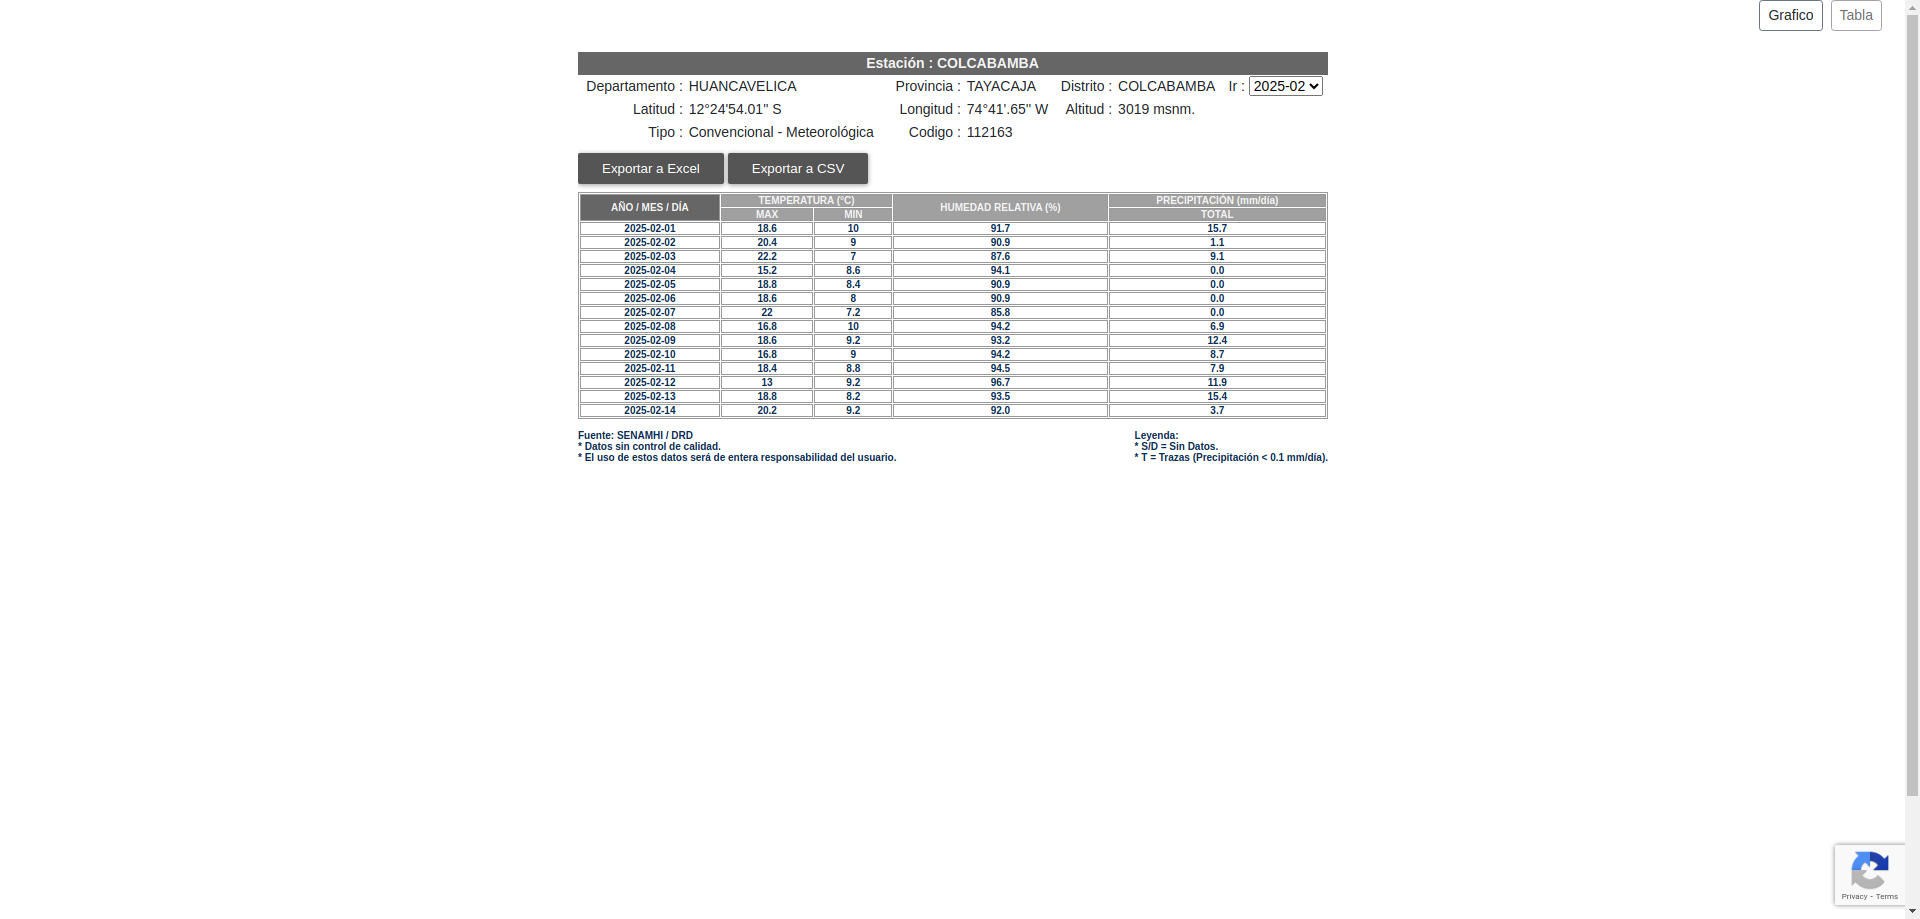

In [15]:
driver.switch_to.frame("contenedor")
take_screenshot(driver, "contenedor")

Captura de pantalla guardada: /tmp/export101.png


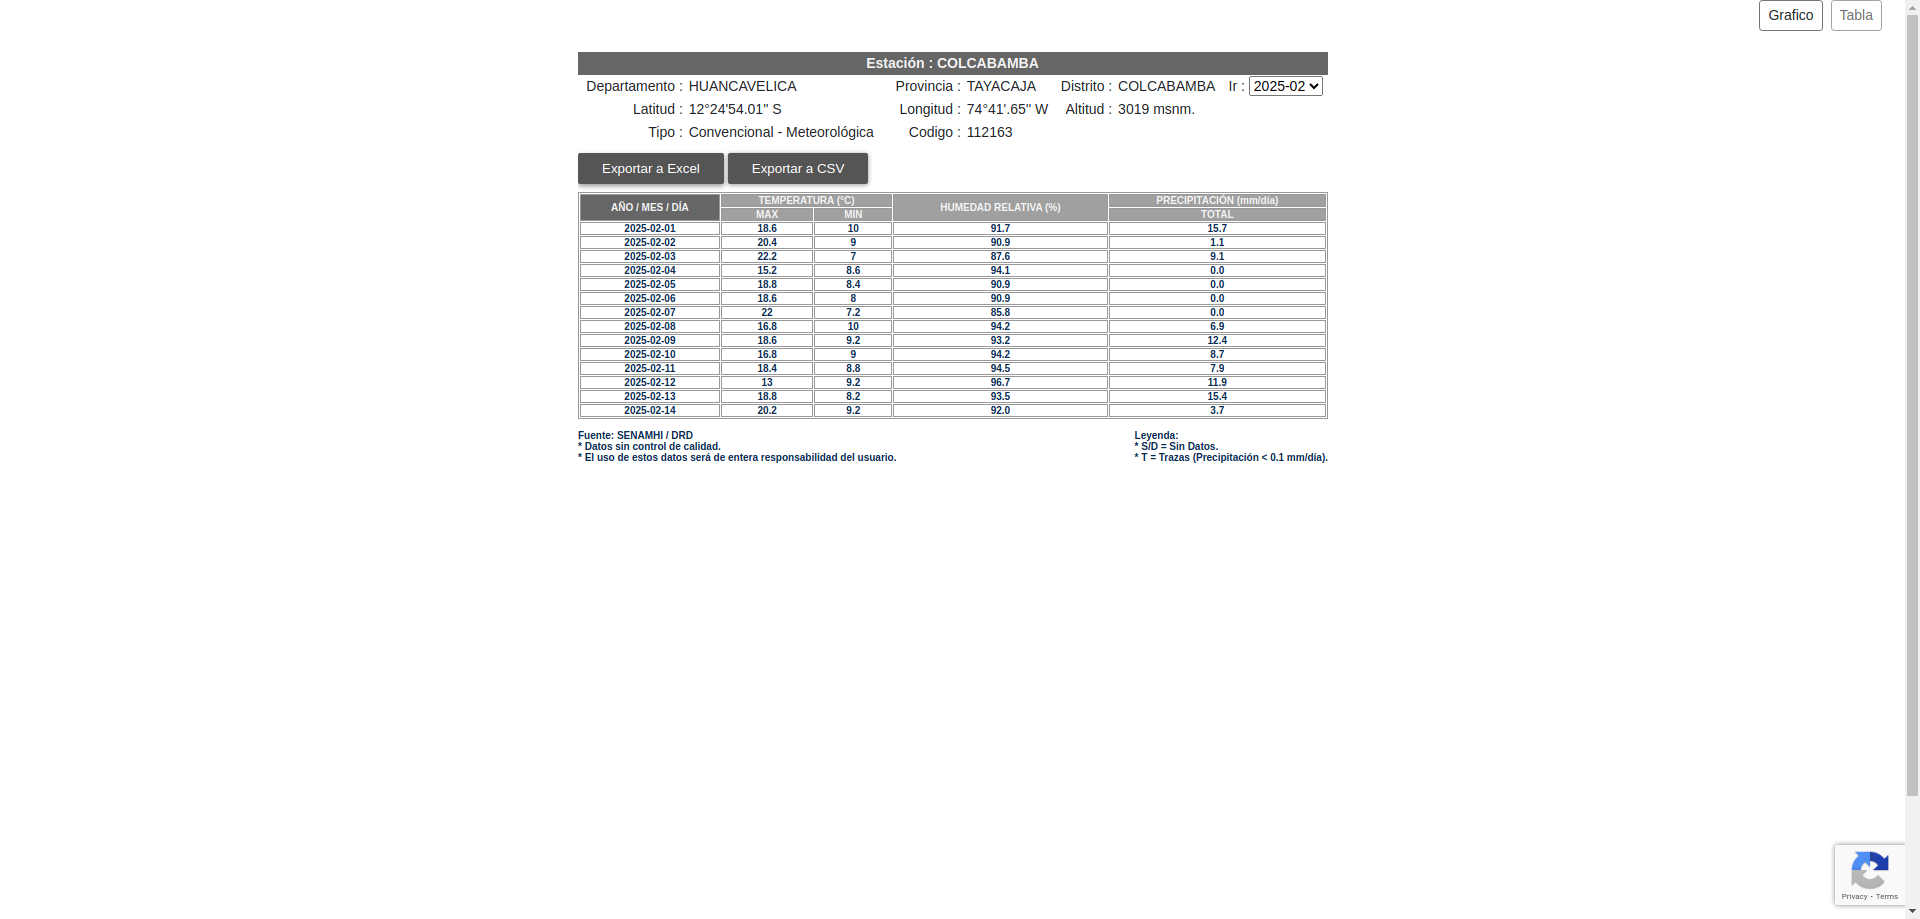

In [16]:
driver.find_element(By.ID, "export101").click()
take_screenshot(driver, "export101")

In [17]:
driver.quit()